In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rc
from scipy.signal import find_peaks 
from cProfile import label

# Solutions with only MnCl2

In [2]:
V_array = np.array([0.005, 0.005, 0.005, 0.01, 0.01, 0.01, 0.01, 0.01])
m_array = np.array([3.440, 1.754, 0.870, 0.829, 0.457, 0.205, 0.118, 0.050])

In [3]:
def conc_MnCl2(m, V):
  c = m/(197.91*V)
  return c

def epsilon(A, c):
  eps = A/c
  return eps

def H_conc(pH, c, V):
  c_H = 10**(-pH)
  V_H = (c*V)/c_H
  return c_H, V_H

def cross_section(c, A):
  n=(6.022*10**23)*(c/1000) #c is in mol/L so the divirion by 1000 is conversion from L to cm**3
  sigma=A/n #l is not included since it is equal to 1cm
  return sigma

In [4]:
c_list = conc_MnCl2(m_array, V_array)
print(c_list)

[3.47632762 1.77252286 0.87918751 0.41887727 0.23091304 0.10358244
 0.05962306 0.02526401]


In [5]:
MnCl2_only=pd.read_csv('./MnCl2_data.CSV', sep=';', decimal=',', index_col = 0)
# display(MnCl2_only)

In [6]:
sigma1 = pd.DataFrame(cross_section(c_list[0], MnCl2_only['Sample 1']))
sigma1.columns = ['s1.1']
sigma2 = pd.DataFrame(cross_section(c_list[1], MnCl2_only['Sample 2']))
sigma2.columns = ['s2.1']
sigma3 = pd.DataFrame(cross_section(c_list[2], MnCl2_only['Sample 3']))
sigma3.columns = ['s3.1']
sigma4 = pd.DataFrame(cross_section(c_list[3], MnCl2_only['Sample 4']))
sigma4.columns = ['s4.1']
sigma5 = pd.DataFrame(cross_section(c_list[4], MnCl2_only['Sample 5']))
sigma5.columns = ['s5.1']
sigma6 = pd.DataFrame(cross_section(c_list[5], MnCl2_only['Sample 6']))
sigma6.columns = ['s6.1']
sigma7 = pd.DataFrame(cross_section(c_list[6], MnCl2_only['Sample 7']))
sigma7.columns = ['s7.1']
sigma8 = pd.DataFrame(cross_section(c_list[7], MnCl2_only['Sample 8']))
sigma8.columns = ['s8.1']

cross_sec = pd.DataFrame(np.array([sigma1['s1.1'], sigma2['s2.1'], sigma3['s3.1'], sigma4['s4.1'], sigma5['s5.1'], sigma6['s6.1'], sigma7['s7.1'], sigma8['s8.1']]).T, 
                        columns=['s1.1', 's2.1', 's3.1', 's4.1', 's5.1', 's6.1', 's7.1', 's8.1'], index = MnCl2_only.index.values )
cross_sec = cross_sec.rename_axis(index = "Wavelengt [nm]")
cross_sec.to_csv('cross_sec_MnCl2.csv')

cross_sec_short = pd.DataFrame(np.array([sigma1['s1.1'], sigma2['s2.1'], sigma3['s3.1'], sigma4['s4.1']]).T, 
                        columns=['s1.1', 's2.1', 's3.1', 's4.1'], index = MnCl2_only.index.values )
cross_sec_short = cross_sec_short.rename_axis(index = "Wavelengt [nm]")
cross_sec_short.to_csv('cross_sec_MnCl2Short.csv')

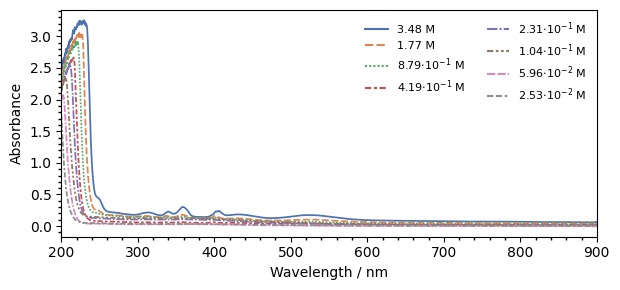

In [45]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = MnCl2_only, lw = 1.25, ) 
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavelength / nm')
# ax.set_ylim(-0.01, 0.35)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.48 M', '1.77 M', '8.79$\cdot$10$^{-1}$ M', '4.19$\cdot$10$^{-1}$ M', '2.31$\cdot$10$^{-1}$ M', '1.04$\cdot$10$^{-1}$ M', '5.96$\cdot$10$^{-2}$ M', '2.53$\cdot$10$^{-2}$ M'],
           frameon = False, ncol = 2, fontsize = 8)
# rcParams['legend.columnspacing']=1
plt.tight_layout()
plt.savefig('only_full.png', dpi=150)

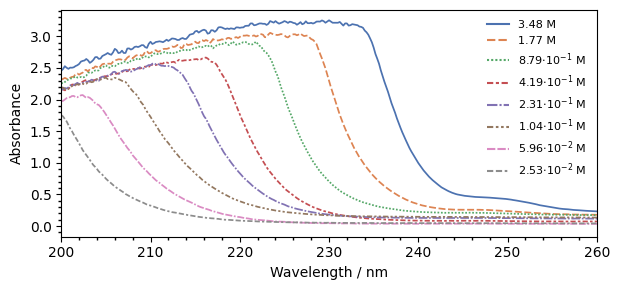

In [46]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = MnCl2_only, lw = 1.25, ) 
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavelength / nm')
# ax.set_ylim(-0.01, 0.35)
ax.set_xlim(200, 260)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.48 M', '1.77 M', '8.79$\cdot$10$^{-1}$ M', '4.19$\cdot$10$^{-1}$ M', '2.31$\cdot$10$^{-1}$ M', '1.04$\cdot$10$^{-1}$ M', '5.96$\cdot$10$^{-2}$ M', '2.53$\cdot$10$^{-2}$ M'],
           frameon = False, fontsize = 8)
# rcParams['legend.columnspacing']=1
plt.tight_layout()
plt.savefig('only_peak.png', dpi=150)

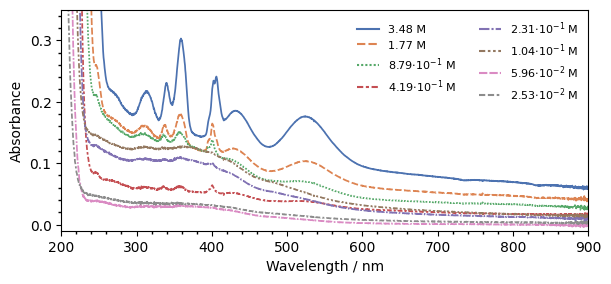

In [47]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = MnCl2_only, lw = 1.25, ) 
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavelength / nm')
ax.set_ylim(-0.01, 0.35)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.48 M', '1.77 M', '8.79$\cdot$10$^{-1}$ M', '4.19$\cdot$10$^{-1}$ M', '2.31$\cdot$10$^{-1}$ M', '1.04$\cdot$10$^{-1}$ M', '5.96$\cdot$10$^{-2}$ M', '2.53$\cdot$10$^{-2}$ M'],
           frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('MnCl2_only.png', dpi=150)

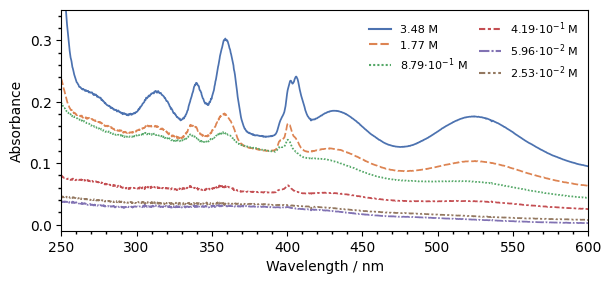

In [48]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = MnCl2_only[['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 7', 'Sample 8']], lw = 1.25) 
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavelength / nm')
ax.set_ylim(-0.01, 0.35)
ax.set_xlim(250, 600)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.48 M', '1.77 M', '8.79$\cdot$10$^{-1}$ M', '4.19$\cdot$10$^{-1}$ M', '5.96$\cdot$10$^{-2}$ M', '2.53$\cdot$10$^{-2}$ M'],
           frameon = False, ncol = 2, columnspacing = 1, fontsize = 8)
# plt.grid()
plt.tight_layout()
plt.savefig('only_zoom.png', dpi=150)

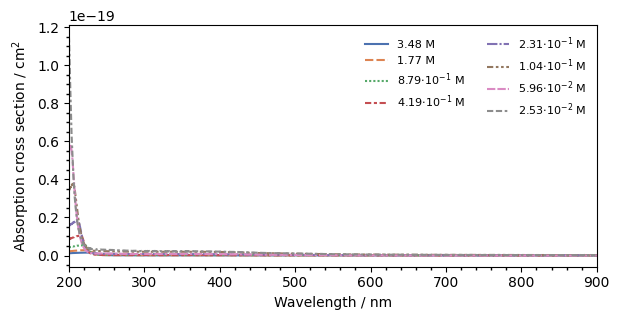

In [64]:
plt.figure(figsize=(6.3,3.3))
sns.set_palette("deep")
ax = sns.lineplot(data = cross_sec) 
ax.set_ylabel(r'Absorption cross section / cm$^{2}$')
ax.set_xlabel('Wavelength / nm')
# ax.set_ylim(-0.01, 0.1)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.48 M', '1.77 M', '8.79$\cdot$10$^{-1}$ M', '4.19$\cdot$10$^{-1}$ M', '2.31$\cdot$10$^{-1}$ M', '1.04$\cdot$10$^{-1}$ M', '5.96$\cdot$10$^{-2}$ M', '2.53$\cdot$10$^{-2}$ M'],
           frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('MnCl2_full_sigma.png', dpi=150)

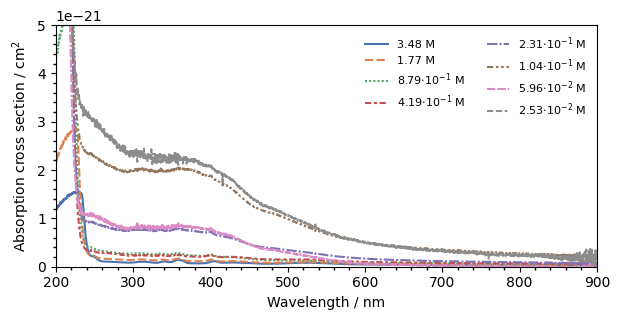

In [66]:
plt.figure(figsize=(6.3,3.3))
sns.set_palette("deep")
ax = sns.lineplot(data = cross_sec) 
ax.set_ylabel(r'Absorption cross section / cm$^{2}$')
ax.set_xlabel('Wavelength / nm')
ax.set_ylim(0, 5*10**(-21))
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.48 M', '1.77 M', '8.79$\cdot$10$^{-1}$ M', '4.19$\cdot$10$^{-1}$ M', '2.31$\cdot$10$^{-1}$ M', '1.04$\cdot$10$^{-1}$ M', '5.96$\cdot$10$^{-2}$ M', '2.53$\cdot$10$^{-2}$ M'],
           frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('MnCl2_sigma.png', dpi=150)

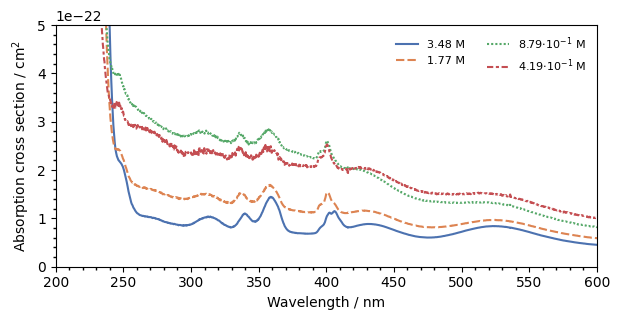

In [67]:
plt.figure(figsize=(6.3,3.3))
sns.set_palette("deep")
ax = sns.lineplot(data = cross_sec_short) 
ax.set_ylabel(r'Absorption cross section / cm$^{2}$')
ax.set_xlabel('Wavelength / nm')
ax.set_ylim(0, 5*10**(-22))
ax.set_xlim(200, 600)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['3.48 M', '1.77 M', '8.79$\cdot$10$^{-1}$ M', '4.19$\cdot$10$^{-1}$ M'],
           frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('MnCl2_zoom_sigma.png', dpi=150)

[313.4, 340.2, 359.4, 403.0, 406.4, 431.6, 524.4]


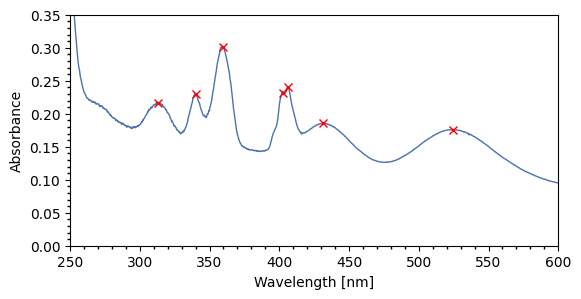

In [49]:
df2 = MnCl2_only['Sample 1'].copy().to_numpy()
for i in range(-4,4):
  df2[5:-6] += df2[5+i:-6+i]
  df2[5:-6] = df2[5:-6]/2
peaksgood, _ = find_peaks(df2[200:2000], distance = 10)
peaksgood = peaksgood + 200

plt.figure(figsize=(6.3,3))
ax = sns.lineplot(data = MnCl2_only['Sample 1'], linewidth = 1)
# plt.plot(MnCl2_only['Sample 1'].index.tolist(), df2, linewidth = 1)
plt.plot(MnCl2_only['Sample 2'].iloc[peaksgood].index.tolist(), MnCl2_only['Sample 1'].iloc[peaksgood].tolist(), "x", color = "r")
print(MnCl2_only['Sample 1'].iloc[peaksgood].index.tolist())
ax.set_ylabel('Absorbance')
ax.set_ylim(0,0.35)
ax.set_xlim(250,600)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
plt.savefig('s1_wmarkers.png', dpi = 150)

[311.4, 337.8, 358.6, 401.6, 428.6, 525.2]


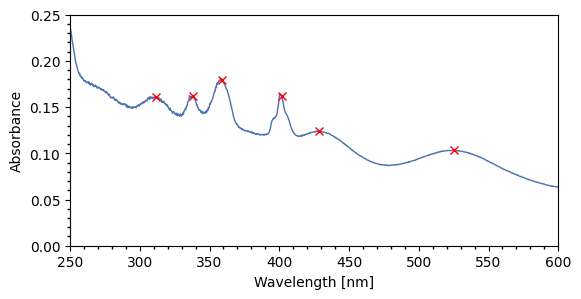

In [48]:
df2 = MnCl2_only['Sample 2'].copy().to_numpy()
for i in range(-5,5):
  df2[5:-6] += df2[5+i:-6+i]
  df2[5:-6] = df2[5:-6]/2
peaksgood, _ = find_peaks(df2[200:2000], distance = 10)
peaksgood = peaksgood + 200

plt.figure(figsize=(6.3,3))
ax = sns.lineplot(data = MnCl2_only['Sample 2'], linewidth = 1)
# plt.plot(MnCl2_only['Sample 2'].index.tolist(), df2, linewidth = 1)
plt.plot(MnCl2_only['Sample 2'].iloc[peaksgood].index.tolist(), MnCl2_only['Sample 2'].iloc[peaksgood].tolist(), "x", color = "r")
print(MnCl2_only['Sample 2'].iloc[peaksgood].index.tolist())
ax.set_ylabel('Absorbance')
ax.set_ylim(0,0.25)
ax.set_xlim(250,600)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
plt.savefig('s2_wmarkers.png', dpi = 150)

[307.4, 311.2, 337.0, 358.0, 401.2, 511.0, 517.4]


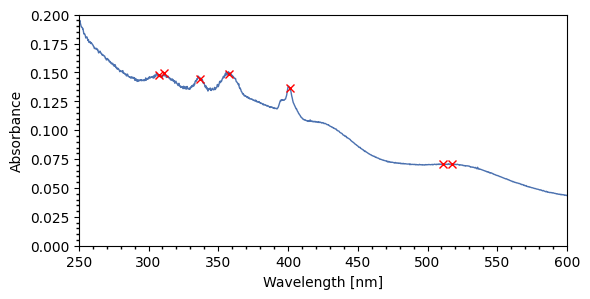

In [47]:
df2 = MnCl2_only['Sample 3'].copy().to_numpy()
for i in range(-7,7):
  df2[8:-9] += df2[8+i:-9+i]
  df2[8:-9] = df2[8:-9]/2
peaksgood, _ = find_peaks(df2[200:2000], distance = 10)
peaksgood = peaksgood + 200

plt.figure(figsize=(6.3,3))
ax = sns.lineplot(data = MnCl2_only['Sample 3'], linewidth = 1)
# plt.plot(MnCl2_only['Sample 2'].index.tolist(), df2, linewidth = 1)
plt.plot(MnCl2_only['Sample 3'].iloc[peaksgood].index.tolist(), MnCl2_only['Sample 3'].iloc[peaksgood].tolist(), "x", color = "r")
print(MnCl2_only['Sample 3'].iloc[peaksgood].index.tolist())
ax.set_ylabel('Absorbance')
ax.set_ylim(0,0.2)
ax.set_xlim(250,600)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
plt.savefig('s3_wmarkers.png', dpi = 150)

[309.4, 336.8, 357.2, 401.2, 425.8, 514.0]


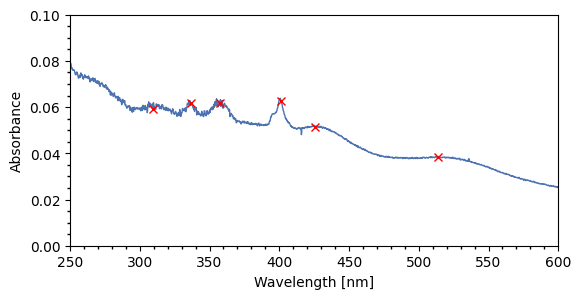

In [46]:
df2 = MnCl2_only['Sample 4'].copy().to_numpy()
for i in range(-8,8):
  df2[8:-9] += df2[8+i:-9+i]
  df2[8:-9] = df2[8:-9]/2
peaksgood, _ = find_peaks(df2[200:2000], distance = 10)
peaksgood = peaksgood + 200

plt.figure(figsize=(6.3,3))
ax = sns.lineplot(data = MnCl2_only['Sample 4'], linewidth = 1)
# plt.plot(MnCl2_only['Sample 2'].index.tolist(), df2, linewidth = 1)
plt.plot(MnCl2_only['Sample 4'].iloc[peaksgood].index.tolist(), MnCl2_only['Sample 4'].iloc[peaksgood].tolist(), "x", color = "r")
print(MnCl2_only['Sample 4'].iloc[peaksgood].index.tolist())
ax.set_ylabel('Absorbance')
ax.set_ylim(0,0.1)
ax.set_xlim(250,600)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
plt.savefig('s4_wmarkers.png', dpi = 150)

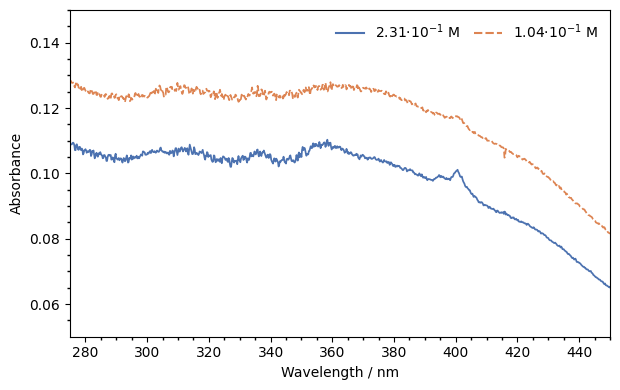

In [8]:
plt.figure(figsize=(6.3,4))
sns.set_palette("deep")
ax = sns.lineplot(data = MnCl2_only[['Sample 5', 'Sample 6']], lw = 1.25) 
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavelength / nm')
ax.set_ylim(0.05, 0.15)
ax.set_xlim(275, 450)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['2.31$\cdot$10$^{-1}$ M', '1.04$\cdot$10$^{-1}$ M'],
           frameon = False, ncol = 2, columnspacing = 1)
# plt.grid()
plt.tight_layout()
plt.savefig('only56_zoom.png', dpi=150)